# Chapter 8 Tree-Based Methods

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc, mean_squared_error

%matplotlib inline

### Example on page 304: Regression Trees

In [5]:
hitters = pd.read_csv('Data/Hitters.csv', index_col = 0)

In [6]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [16]:
dataset = hitters[['Years', 'Hits', 'Salary']].dropna()
X = dataset[['Years', 'Hits']]
y = dataset['Salary']

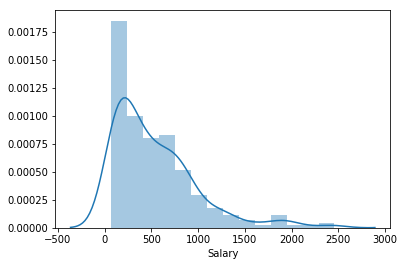

In [20]:
sns.distplot(y)

In [21]:
y = np.log(y) # Transform to a normal-like distribution

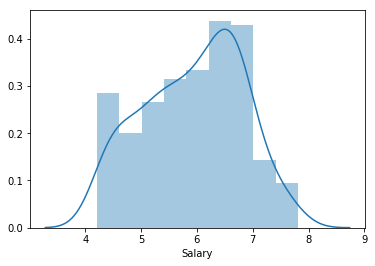

In [22]:
sns.distplot(y)

In [113]:
regr = tree.DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

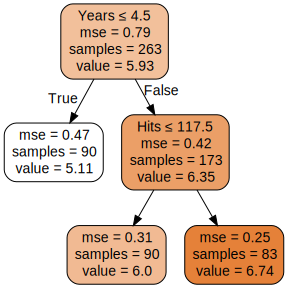

In [116]:
dot_data = tree.export_graphviz(regr, out_file=None, 
                         feature_names=X.columns, 
                         filled=True, rounded=True,  
                         special_characters=True,
                               precision=2)
tree_viz = graphviz.Source(dot_data)
tree_viz

## Labs

### 8.3.1 Fitting Classification Trees

In [170]:
carseats = pd.read_csv('Data/Carseats.csv').drop('Unnamed: 0', axis=1)

In [171]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [172]:
# Converting continuous 'Sales' feature to discrete
bins = [0, 8, carseats['Sales'].max()]
labels = [0, 1]
carseats['High'] = pd.cut(carseats['Sales'], bins = bins, labels = labels)

In [173]:
carseats[['Sales', 'High']].head(5)

,Sales,High
0,9.50,1
1,11.22,1
2,10.06,1
3,7.40,0
4,4.15,0


In [174]:
# Encoding categorical variables
carseats.ShelveLoc = pd.factorize(carseats.ShelveLoc)[0]
carseats.Urban = carseats.Urban.map({'No':0, 'Yes':1})
carseats.US = carseats.US.map({'No':0, 'Yes':1})

In [175]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [176]:
carseats = carseats.dropna()

In [177]:
len(carseats)

399

In [178]:
y = carseats.High
X = carseats.drop(['Sales', 'High'], axis=1)

In [179]:
len(X)

399

In [180]:
clf = tree.DecisionTreeClassifier(max_depth=6)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

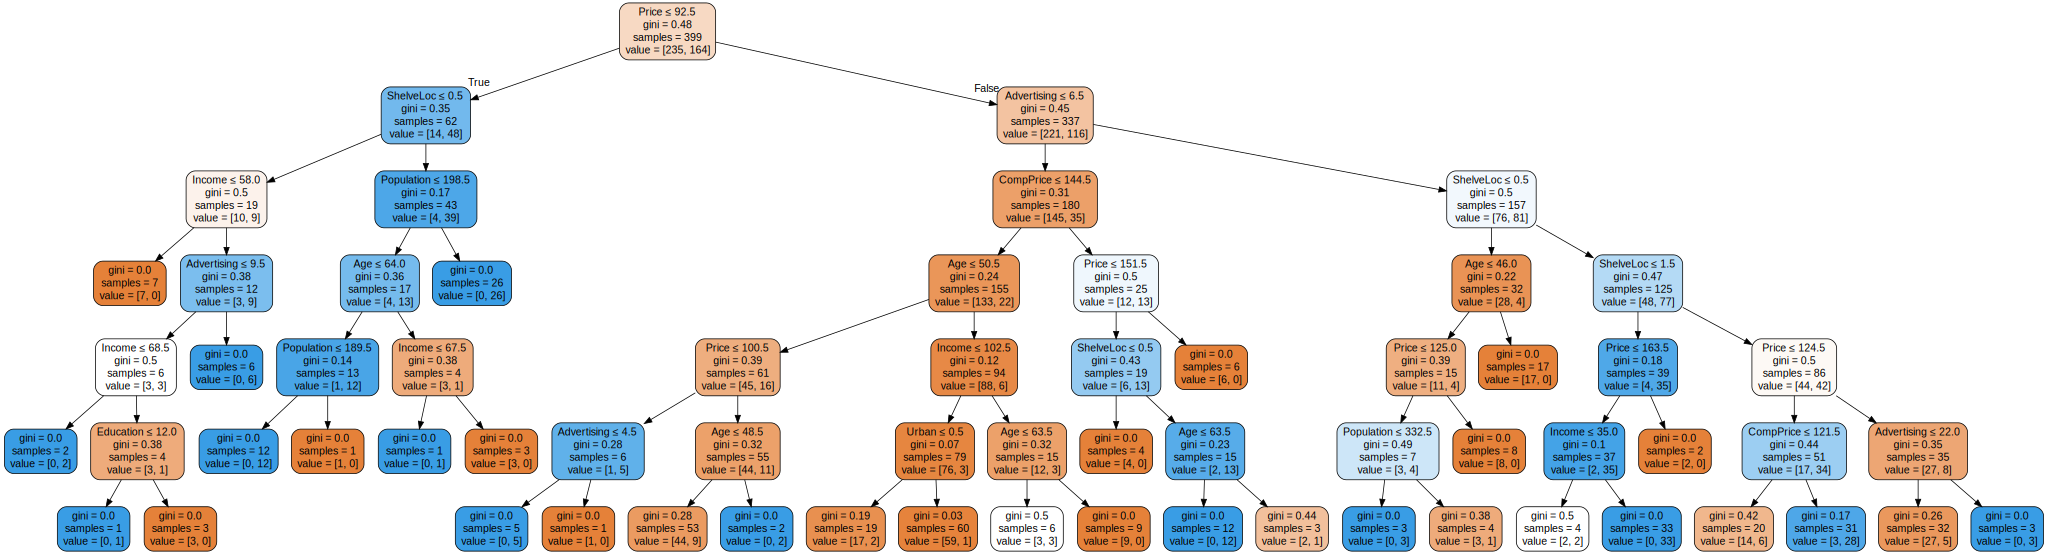

In [181]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns, 
                         filled=True, rounded=True,  
                         special_characters=True,
                               precision=2)
tree_viz = graphviz.Source(dot_data)
tree_viz

In [183]:
print(classification_report(y, clf.predict(X)))

             precision    recall  f1-score   support

          0       0.89      0.99      0.93       235
          1       0.98      0.82      0.89       164

avg / total       0.92      0.92      0.92       399



Sklearn's doumentation for [understanding the tree structure](http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html)

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [194]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [195]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.80      0.75      0.77       121
          1       0.65      0.71      0.68        79

avg / total       0.74      0.73      0.74       200



In [200]:
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['Low Sales', 'High Sales'], columns=['Low Sales', 'High Sales'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,Low Sales,High Sales
Predicted,,
Low Sales,91,23
High Sales,30,56


### 8.3.2 Fitting Regression Trees

In [201]:
from sklearn.datasets import load_boston

In [235]:
boston = load_boston()

In [236]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['MEDV'] = boston.target

In [237]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [239]:
X = boston_df.drop('MEDV', axis=1)
y = boston_df.MEDV

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [255]:
regr = tree.DecisionTreeRegressor(max_depth=4)
regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

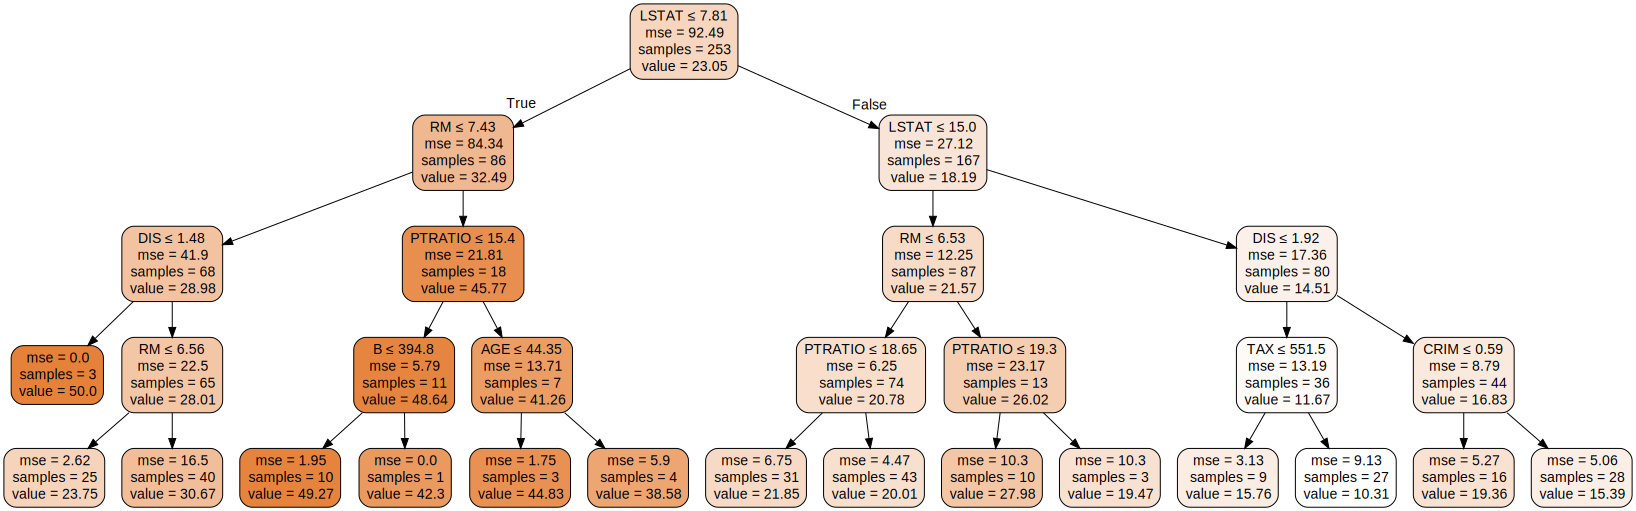

In [256]:
dot_data = tree.export_graphviz(regr, out_file=None, 
                         feature_names=X.columns, 
                         filled=True, rounded=True,  
                         special_characters=True,
                               precision=2)
tree_viz = graphviz.Source(dot_data)
tree_viz

In [257]:
pred = regr.predict(X_test)

In [258]:
mean_squared_error(y_test, pred)

23.817371513828622

### 8.3.3 Bagging and Random Forests

In [261]:
# 13 features in the dataset
X.shape

(506, 13)

In [262]:
# Bagging: using all features
regr = RandomForestRegressor(max_features=13, random_state=1)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [263]:
pred = regr.predict(X_test)

In [264]:
mean_squared_error(y_test, pred)

18.333358498023717

In [265]:
# random forest with m = 6
regr = RandomForestRegressor(max_features=6, random_state=1)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [266]:
pred = regr.predict(X_test)

In [267]:
mean_squared_error(y_test, pred)

16.536445454545454

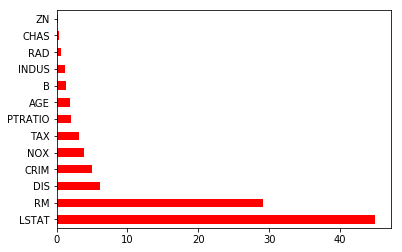

In [282]:
importance = pd.Series(regr.feature_importances_ * 100, index = X.columns)
importance = importance.sort_values(axis=0, ascending = False)
importance.plot(kind='barh', color='r', )

### 8.3.4 Boosting

In [283]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

In [284]:
pred = regr.predict(X_test)

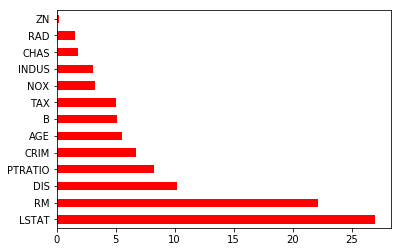

In [286]:
importance = pd.Series(regr.feature_importances_ * 100, index = X.columns)
importance = importance.sort_values(axis=0, ascending = False)
importance.plot(kind='barh', color='r', )

In [287]:
mean_squared_error(y_test, pred)

15.542062859148302